In [1]:
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import HTML
import seaborn as sns
from scipy.special import expit as sigmoid
import pandas as pd
sns.set()
df = pd.read_csv('poverty.csv')
df.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


In [2]:
X = df.iloc[:, 1:2].values
Y = df.iloc[:, 2:3].values

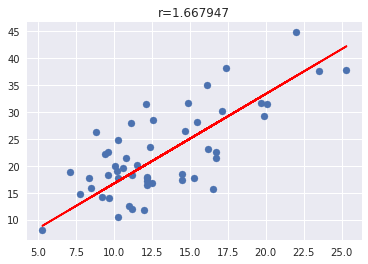

In [3]:
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
plt.scatter(X[:,0],Y[:,0])
plt.plot(X,X.dot(w), c='red')
plt.title('r=%f'%w[0,0])
plt.show()

In [4]:
def train_gradient_mean_square(epoch, X, Y, learning_rate, m = 0, b = 0):
    for i in range(epoch):
        y_hat = (m * X) + b
        m_gradient = -(2/X.shape[0]) * np.sum(X * (Y - y_hat))
        b_gradient = -(2/X.shape[0]) * np.sum(Y - y_hat)
        m -= learning_rate * m_gradient
        b -= learning_rate * b_gradient
    return m, b

In [5]:
m, b = train_gradient_mean_square(100, X, Y, 0.0001, m = 0, b = 0)

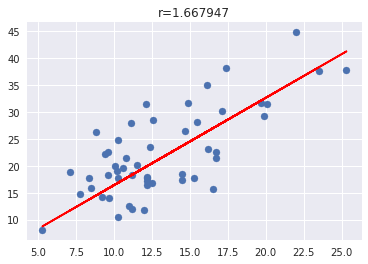

In [6]:
plt.scatter(X[:,0],Y[:,0])
plt.plot(X,(m * X) + b, c='red')
plt.title('r=%f'%w[0,0])
plt.show()

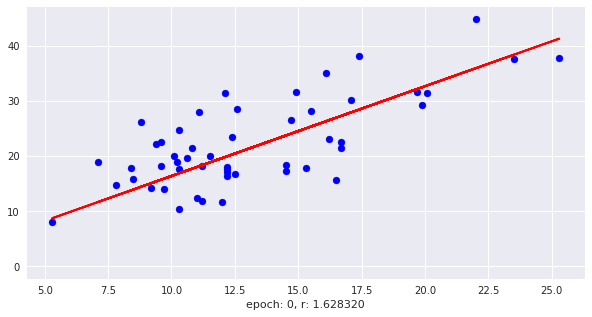

In [7]:
learning_rate = 0.0001
m = 0
b = 0

fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.scatter(X[:,0],Y[:,0], c='b')
ax.set_xlabel('epoch: %d, r: %f'%(0,m))
line, = ax.plot(X,X * m + b, lw=2, c='r')

def init():
    line.set_data(X,X * m + b)
    return line,

def gradient_mean_square(epoch):
    global m, b
    y_hat = (m * X) + b
    m_gradient = -(2/X.shape[0]) * np.sum(X * (Y - y_hat))
    b_gradient = -(2/X.shape[0]) * np.sum(Y - y_hat)
    m -= learning_rate * m_gradient
    b -= learning_rate * b_gradient
    line.set_data(X,X * m + b)
    ax.set_xlabel('epoch: %d, r: %f'%(epoch,m))
    return line, ax

anim = animation.FuncAnimation(fig, gradient_mean_square, frames=100, interval=200)
anim.save('animation-linear-regression.gif', writer='imagemagick', fps=10)